<a href="https://colab.research.google.com/github/Cipe96/EEG-Recognition/blob/main/Analisi_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6>**EEg Recognition: Analisi Dataset**</font>
</br><font size=3>*Marco Cipollina, Riccardo Era*</font>


<font size=4>**Indice:**</font>
*   [Import librerie](#1)
*   [Downloads](#2)
*   [Analisi Dataset](#3)

<a name="1"></a>
# **Import librerie**

Iniziamo installando la libreria MNE, essenziale per l'analisi di dati EEG grazie alla sua gestione di file in formato EDF.

In [43]:
%%capture
# evita l' output a video
!pip install mne

Importiamo le librerie e montiamo Google Drive per garantire l'accesso agli altri file.

In [60]:
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import drive
import pandas as pd
import numpy as np
import json
import sys
import mne
import os

In [37]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [34]:
#@title Percorso della cartella del progetto su Google Drive:

#@markdown Se la cartella del progetto si trova nella root di Drive, scrivere solo il suo nome:
PERCORSO_DRIVE = "EEG Recognition (1)" #@param {type:"string"}

PERCORSO_DRIVE = '/content/drive/MyDrive/' + PERCORSO_DRIVE

In [ ]:
print(PERCORSO_DRIVE)

/content/drive/MyDrive/EEG Recognition (1)


In [ ]:
sys.path.append(PERCORSO_DRIVE)                       # ci permetterà di importare le funzioni presenti in altri file
from shared_utilities import download_dataset

Scarichiamo dal file "EEG_Motor_Movement-Imagery_R01_ID.json" l'ID necessario per il download del dataset.

In [ ]:
with open(PERCORSO_DRIVE + '/EEG_Motor_Movement-Imagery_ID.json', 'r') as file:
  config = json.load(file)

DATASET_ID = config['DATASET_ID']

<a name="2"></a>
# **Download**

In [ ]:
#@title Impostazioni download

#@markdown Nome del zip dataset post download:
DATASET_NAME = 'EEG_Motor_Movement-Imagery.zip' #@param {type:"string"}

download_dataset(DATASET_ID, DATASET_NAME, msg=True)

Downloading...
From (original): https://drive.google.com/uc?id=1WwuAh25Jfx-I8rY3vFGyXiI79YfLYUpH
From (redirected): https://drive.google.com/uc?id=1WwuAh25Jfx-I8rY3vFGyXiI79YfLYUpH&confirm=t&uuid=135104ab-5ac8-459a-a7e5-840ac55052ba
To: /content/EEG_Motor_Movement-Imagery.zip
100%|██████████| 76.6M/76.6M [00:02<00:00, 34.0MB/s]


File scaricato e salvato come EEG_Motor_Movement-Imagery.zip!



Dopo aver scaricato il dataset lo unzippiamo ed eliminiamo i file txt e la cartella sample_data creata automaticamente da Colab.

In [38]:
%%capture

! unzip "{DATASET_NAME}"              # unzippa il file zip
! rm /content/AMSL/*.txt              # elimina i file txt
! rm -r /content/sample_data          # elimina la cartella di default di Colab

<a name="3"></a>
# **Analisi Dataset**

## Numero di classi

Dato che il nostro dataset è composto da una sola sessione per ciascuno volontario, ognuno dei quali rappresenta una "classe", possiamo esplicitare il numero delle classi listando tutti i file .edf nella directory assegnado un'etichetta univoca a ciascuno:

In [56]:
dataset_path = '/content/EEG_T0/'
files = os.listdir(dataset_path)
classi = [f'volontario_{i+1}' for i in range(len(files))]
print(f"Numero di classi (volontari): {len(classes)}")

Numero di classi (volontari): 109


## Campioni per classe

Utilizziamo una funzione della libreria MNE per ricavare il numero di campioni presenti per ogni specifico EEG relativo ai diversi volonari.

In [57]:
%%capture
campioni_per_classe = {}
for i, file in enumerate(files):
    raw_data = mne.io.read_raw_edf(f"{dataset_path}/{file}", preload=True)
    campioni_per_classe[classi[i]] = raw_data.n_times

In [58]:
print("Numero di campioni per classe:", campioni_per_classe)

Numero di campioni per classe: {'volontario_1': 9760, 'volontario_2': 9760, 'volontario_3': 9760, 'volontario_4': 9600, 'volontario_5': 9760, 'volontario_6': 9760, 'volontario_7': 9760, 'volontario_8': 9600, 'volontario_9': 9600, 'volontario_10': 9760, 'volontario_11': 9760, 'volontario_12': 9760, 'volontario_13': 9760, 'volontario_14': 9760, 'volontario_15': 9760, 'volontario_16': 9760, 'volontario_17': 9760, 'volontario_18': 9760, 'volontario_19': 9760, 'volontario_20': 9760, 'volontario_21': 9760, 'volontario_22': 9760, 'volontario_23': 9760, 'volontario_24': 9760, 'volontario_25': 9760, 'volontario_26': 9760, 'volontario_27': 9760, 'volontario_28': 9760, 'volontario_29': 9760, 'volontario_30': 9760, 'volontario_31': 9760, 'volontario_32': 9760, 'volontario_33': 9760, 'volontario_34': 9760, 'volontario_35': 9760, 'volontario_36': 9760, 'volontario_37': 9760, 'volontario_38': 9760, 'volontario_39': 9760, 'volontario_40': 9760, 'volontario_41': 9760, 'volontario_42': 9760, 'volontario

Dalle informazioni raccolta costruiamo un bar plot per verificare il bilanciamento di campioni per classe.

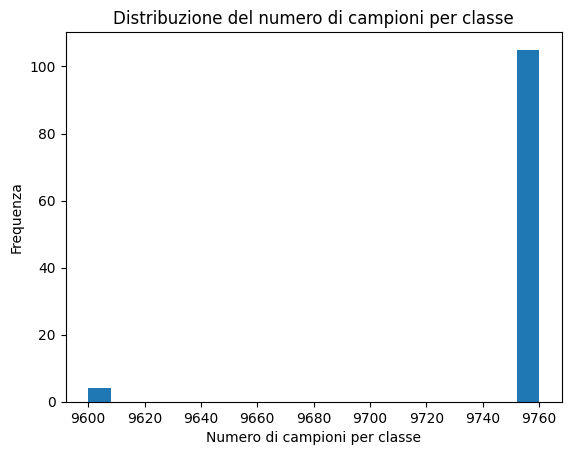

Media dei campioni per classe: 9754.13


In [59]:
# Lista dei campioni per ogni volontario
counts = list(campioni_per_classe.values())
plt.hist(counts, bins=20)
plt.xlabel("Numero di campioni per classe")
plt.ylabel("Frequenza")
plt.title("Distribuzione del numero di campioni per classe")
plt.show()

# Analisi di bilanciamento
media_campioni = sum(counts) / len(counts)
print(f"Media dei campioni per classe: {media_campioni:.2f}")


In [61]:
# Conta le occorrenze di ciascun numero di campioni
conteggio_campioni = Counter(campioni_per_classe.values())

# Stampa il numero di classi per ciascun numero di campioni
for numero_campioni, numero_classi in conteggio_campioni.items():
    print(f"{numero_classi} classi hanno {numero_campioni} campioni")

105 classi hanno 9760 campioni
4 classi hanno 9600 campioni


Come possiamo notare prima visivamente e poi nel dettaglio, il nostro dataset risulta essere molto bilanciato fra le varie classi